<a href="https://colab.research.google.com/github/garfield-gray/DataMining/blob/main/Data_Warehousing_%26_OLAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Theoretical

16.645714285714284

14

#Imperical

##1

In [4]:
# Address of files
%cd /content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#2
!ls

/content/drive/MyDrive/Uni/Data/DataMining/Winter2024/CA#2
 CA#2Report.docx  'Data Warehousing & OLAP.ipynb'   weatherAUS.csv


In [6]:
df = pd.read_csv('weatherAUS.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [11]:
df = df.drop(columns = ['Cloud9am', 'Cloud3pm'])

df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].fillna(method='pad')

df[['WindDir9am', 'WindDir3pm']] = df[['WindDir9am', 'WindDir3pm']].fillna(method='pad')

df['Pressure9am'].fillna(value=np.nanmean(df['Pressure9am']), inplace=True)
df['Pressure3pm'].fillna(value=np.nanmean(df['Pressure3pm']), inplace=True)

df['Sunshine'].fillna(value=np.nanmean(df['Sunshine']), inplace=True)
df['Evaporation'].fillna(value=np.nanmean(df['Evaporation']), inplace=True)

df['Temp9am'].fillna(value=np.nanmean(df['Temp9am']), inplace=True)
df['Temp3pm'].fillna(value=np.nanmean(df['Temp3pm']), inplace=True)
df['MinTemp'].fillna(value=np.nanmean(df['MinTemp']), inplace=True)
df['MaxTemp'].fillna(value=np.nanmean(df['MaxTemp']), inplace=True)

df['Rainfall'].fillna(value=np.nanmean(df['Rainfall']), inplace=True)

df['WindSpeed9am'].fillna(value=np.nanmedian(df['WindSpeed9am']), inplace=True)
df['WindSpeed3pm'].fillna(value=np.nanmedian(df['WindSpeed3pm']), inplace=True)

df['Humidity9am'].fillna(value=np.nanmedian(df['Humidity9am']), inplace=True)
df['Humidity3pm'].fillna(value=np.nanmedian(df['Humidity3pm']), inplace=True)

df['WindGustSpeed'].fillna(value=np.nanmean(df['WindGustSpeed']), inplace=True)

df['WindGustDir'] = df['WindGustDir'].fillna(method='pad')


In [12]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df = df.round({
  'Temp3pm':0,
  'Temp9am':0,
  'MinTemp':0,
  'MaxTemp':0,})

convert_dict = {
    'Temp3pm':'Int8',
    'Temp9am':'Int8',
    'MinTemp':'Int8',
    'MaxTemp':'Int8',
}

df = df.astype(convert_dict)
df.memory_usage(deep=True).sum() / 1024**2

71.67541217803955

In [14]:
convert_dict = {
    'WindDir9am':'category',
    'WindDir3pm':'category',
    'WindGustDir': 'category'
}

df = df.astype(convert_dict)
df.memory_usage(deep=True).sum() / 1024**2

47.469648361206055

In [15]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0 })
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
convert_dict = {
    'RainToday':'boolean',
    'RainTomorrow':'boolean',
}

df = df.astype(convert_dict)
df.memory_usage(deep=True).sum() / 1024**2

31.592915534973145

In [17]:
df['Date']= pd.to_datetime(df['Date'])
df.memory_usage(deep=True).sum() / 1024**2

23.40834903717041

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  Int8          
 3   MaxTemp        145460 non-null  Int8          
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  category      
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  category      
 10  WindDir3pm     145460 non-null  category      
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

##2

In [20]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13,23,0.6,5.468232,7.611178,W,44.00000,W,...,20.0,24.0,71.0,22.0,1007.7,1007.1,17,22,False,False
1,2008-12-02,Albury,7,25,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,4.0,22.0,44.0,25.0,1010.6,1007.8,17,24,False,False
2,2008-12-03,Albury,13,26,0.0,5.468232,7.611178,WSW,46.00000,W,...,19.0,26.0,38.0,30.0,1007.6,1008.7,21,23,False,False
3,2008-12-04,Albury,9,28,0.0,5.468232,7.611178,NE,24.00000,SE,...,11.0,9.0,45.0,16.0,1017.6,1012.8,18,26,False,False
4,2008-12-05,Albury,18,32,1.0,5.468232,7.611178,W,41.00000,ENE,...,7.0,20.0,82.0,33.0,1010.8,1006.0,18,30,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,3,23,0.0,5.468232,7.611178,E,31.00000,SE,...,13.0,11.0,51.0,24.0,1024.6,1020.3,10,22,False,False
145456,2017-06-22,Uluru,4,25,0.0,5.468232,7.611178,NNW,22.00000,SE,...,13.0,9.0,56.0,21.0,1023.5,1019.1,11,24,False,False
145457,2017-06-23,Uluru,5,27,0.0,5.468232,7.611178,N,37.00000,SE,...,9.0,9.0,53.0,24.0,1021.0,1016.8,12,26,False,False
145458,2017-06-24,Uluru,8,27,0.0,5.468232,7.611178,SE,28.00000,SSE,...,13.0,7.0,51.0,24.0,1019.4,1016.5,15,26,False,False


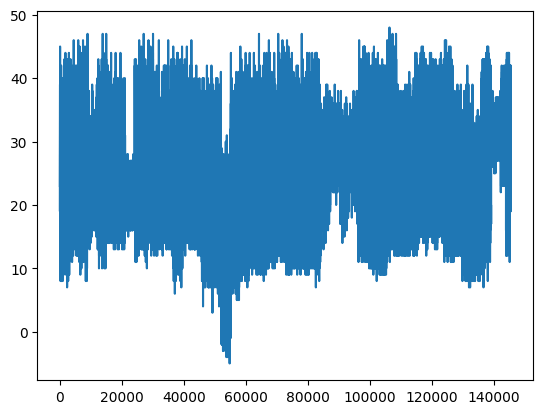

In [22]:
plt.plot(df['MaxTemp'])
plt.show()

##3